# Ejercicio
Este ejercicio es lo más similar a una prueba, por lo que hay que hacerlo lo más idoneo posible
Hacer visualizaciones
matriz de correlacion
Ejercicio supervisado
Benchmark de modelos
Reporte de clasificación (solo 3 modelos)
Curva ROC si corresponde

## las librerías

In [192]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [193]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.metrics import roc_auc_score, plot_roc_curve


from sklearn.model_selection import GridSearchCV

## El archivo

In [194]:
archivo='/Users/matiasinostrozacifuentes/Desktop/python_intro/DataScience_Unilever/Semana_8/Data/Maternal Health Risk Data Set.csv'
df=pd.read_csv(archivo)

In [195]:
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [197]:
df.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [198]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [199]:
df.duplicated().sum()

562

In [200]:
df.drop_duplicates(inplace=True)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 0 to 705
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          452 non-null    int64  
 1   SystolicBP   452 non-null    int64  
 2   DiastolicBP  452 non-null    int64  
 3   BS           452 non-null    float64
 4   BodyTemp     452 non-null    float64
 5   HeartRate    452 non-null    int64  
 6   RiskLevel    452 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 28.2+ KB


## algunas visualizaciones

In [202]:
tiposdatos2=pd.DataFrame(df.dtypes) #Codigo mostrado en clases por un compañero
tiposdatos2.reset_index(inplace=True)
tiposdatos2

,index,0
0,Age,int64
1,SystolicBP,int64
2,DiastolicBP,int64
3,BS,float64
4,BodyTemp,float64
5,HeartRate,int64
6,RiskLevel,object


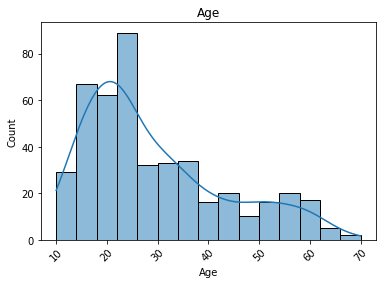

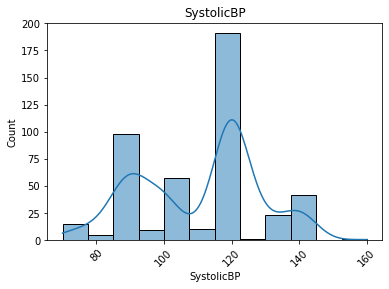

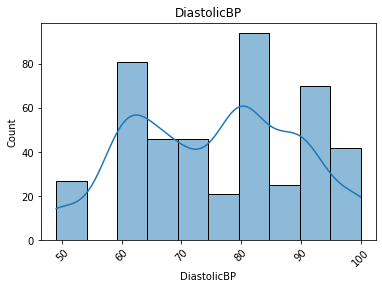

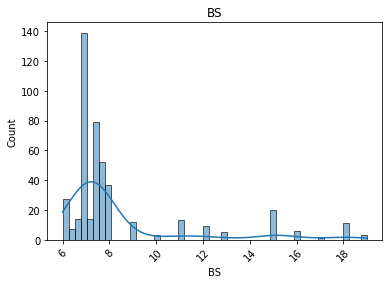

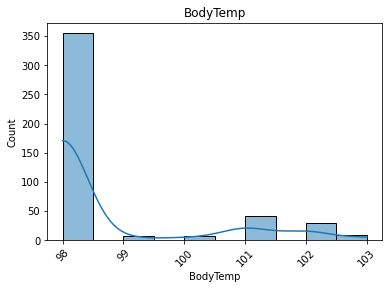

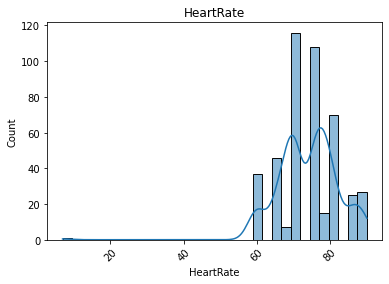

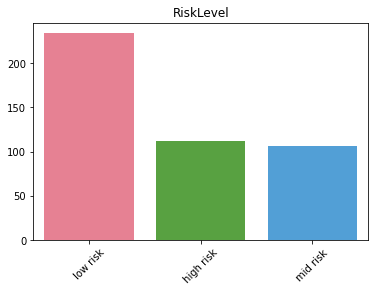

In [203]:
for i in range(df.shape[1]):
        if df.dtypes[i] != 'object':
                sns.histplot(df[tiposdatos2['index'][i]],kde=True)
                plt.xticks(rotation=45)
                plt.title(tiposdatos2['index'][i])
                plt.show()
        else:
                obj=df[tiposdatos2['index'][i]].value_counts()
                sns.barplot(x=obj.index,y=obj.values,palette='husl')
                plt.xticks(rotation=45)
                plt.title(tiposdatos2['index'][i])

                plt.show()

In [204]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,29.194690,110.553097,75.418142,8.346173,98.692478,73.949115
std,13.767379,17.872282,13.754578,2.829209,1.410897,8.156973
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,90.000000,65.000000,6.900000,98.000000,70.000000
50%,25.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,35.000000,120.000000,86.000000,7.900000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [205]:
ErrorH=df['HeartRate']<=40
ErrorH

0      False
1      False
2      False
3      False
4      False
       ...  
673    False
674    False
703    False
704    False
705    False
Name: HeartRate, Length: 452, dtype: bool

In [206]:
#para borrar solo un valor 
# df.drop([499])

In [207]:
df=df.loc[~ErrorH,:]
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
673,12,100,50,6.4,98.0,70,mid risk
674,15,100,60,6.0,98.0,80,low risk
703,15,100,49,7.6,98.0,77,low risk
704,12,100,50,6.0,98.0,70,mid risk


Text(0.5, 1.0, 'Comparación entre Edad y Systolic BP')

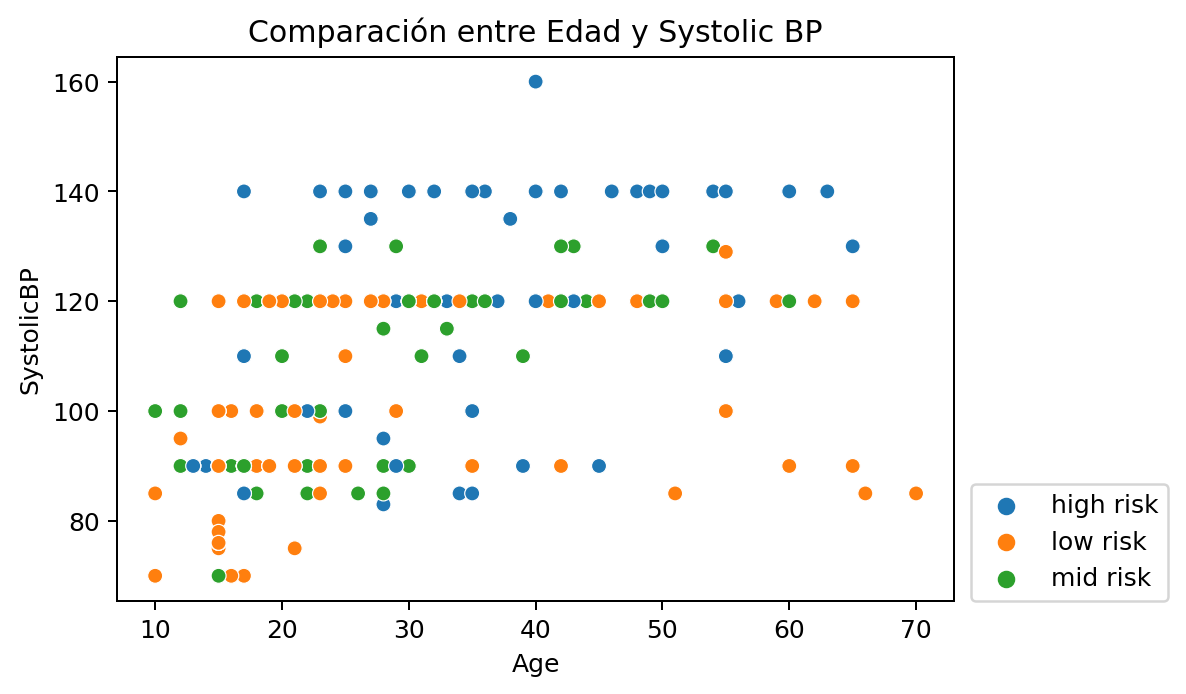

In [208]:
plt.figure(dpi=180)
sns.scatterplot(data=df,x='Age',y='SystolicBP',hue='RiskLevel')
plt.legend(loc=[1.02,0])
plt.title('Comparación entre Edad y Systolic BP')

Text(0.5, 1.0, 'Comparación entre Edad y Systolic BP')

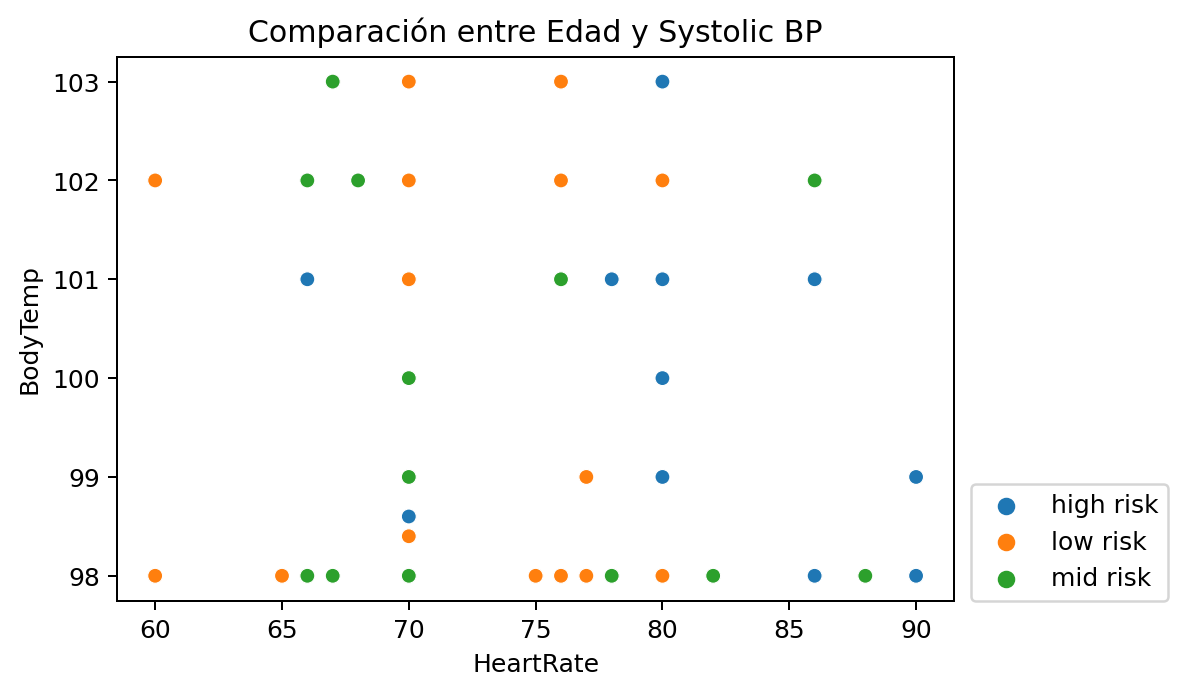

In [209]:
plt.figure(dpi=180)
sns.scatterplot(data=df,x='HeartRate',y='BodyTemp',hue='RiskLevel')
plt.legend(loc=[1.02,0])
plt.title('Comparación entre Edad y Systolic BP')

<Figure size 1200x800 with 0 Axes>

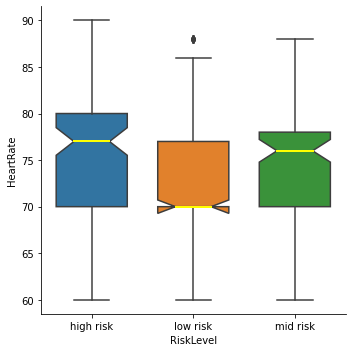

In [210]:
plt.figure(dpi=200)
sns.catplot(data=df,x='RiskLevel',y='HeartRate',kind='box',notch=True,width = .7,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'))

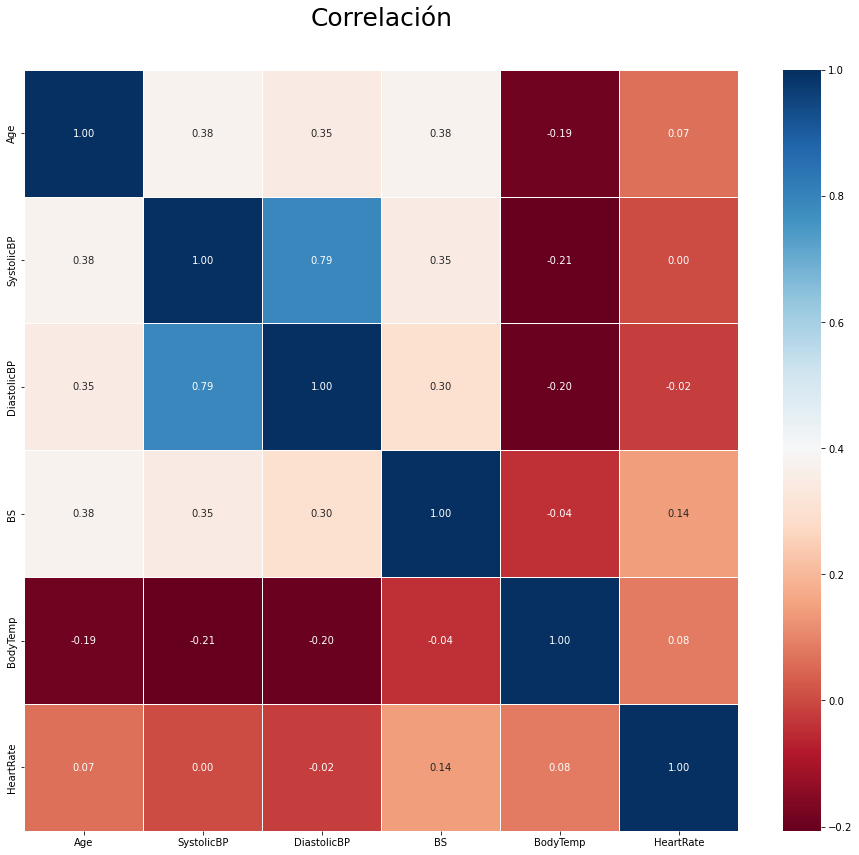

In [211]:

colormap = plt.cm.RdBu
plt.figure(figsize=(16,14))
plt.title('Correlación', y=1.05, size=25,)
sns.heatmap(df.corr(),linewidths=0.5,
             cmap=colormap, linecolor='white', annot=True,fmt='.2f')
plt.savefig("Plot generated using Matplotlib6.png")
plt.show()

Dado esto se procede a ocupar los siguientes modelos de clasificación:
- KNN
- Decision tree
- Logistic Regression

## separando la data

In [212]:
X = df.drop(columns=['RiskLevel'])
y = df["RiskLevel"]

In [213]:
y.value_counts()

low risk     233
high risk    112
mid risk     106
Name: RiskLevel, dtype: int64

In [214]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3,stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5,stratify=y_val)

In [215]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val=scaler.transform(X_val)

# los modelos

In [216]:
def plotCMa(cma,labels):
    cma = cma/cma.sum(axis=1).reshape(-1,1)
    f= plt.figure(figsize=(16, 10))
    plt.matshow(cma, fignum=f.number)
    plt.clim(0, 1)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Confusion matrix", fontsize=20)
    plt.xticks(range(len(labels)), [f"{label} (Etiqueta)" for label in labels], fontsize=16)
    plt.yticks(range(len(labels)), [f"{label} (Real)" for label in labels], fontsize=16)
    ax = plt.gca()

    for i in range(cma.shape[0]):
        for j in range(cma.shape[1]):
            value = cma[i][j]
            ax.text(j,i,"{0:.4f}".format(value),ha="center", va="center", color="k", fontsize=16)

    plt.show()

## knn

In [217]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train) 
predictions = knn.predict(X_val)
accuracy=knn.score(X_val, y_val)
print('Accuracy:',accuracy)

Accuracy: 0.6617647058823529


In [218]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=3,scoring='recall',return_train_score=True,verbose=1)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py", lin

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             return_train_score=True, scoring='recall', verbose=1)

In [219]:
print('Mejores hiperparametros: %s' % grid.best_params_)

Mejores hiperparametros: {'n_neighbors': 1}


In [220]:
print('Best Score: %s' % grid.scorer_)

Best Score: make_scorer(recall_score, average=binary)


In [221]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train) 
predictions = knn.predict(X_val)
accuracy=knn.score(X_val, y_val)
print('Accuracy:',accuracy)

Accuracy: 0.6029411764705882


In [222]:
predictions = knn.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

   high risk       0.61      0.82      0.70        17
    low risk       0.74      0.83      0.78        35
    mid risk       0.17      0.06      0.09        16

    accuracy                           0.65        68
   macro avg       0.51      0.57      0.52        68
weighted avg       0.57      0.65      0.60        68



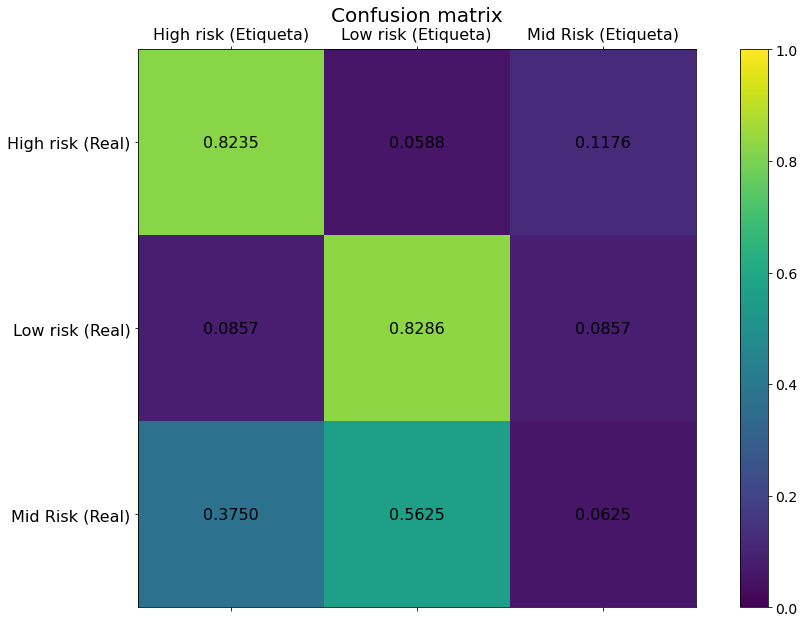

In [223]:
cm = metrics.confusion_matrix(y_test,predictions)
plotCMa(cm,['High risk','Low risk','Mid Risk'])

## Decision tree

In [224]:
tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(X_train, y_train)
print('Accuracy', tree_clf.score(X_val, y_val))


Accuracy 0.7352941176470589


In [225]:
param_grid = [{'max_depth':[1,2,3,4,5,6,7,8,9,10]}
]

arbol_clf = DecisionTreeClassifier()

grid_search = GridSearchCV(arbol_clf, param_grid, cv=5,
                          return_train_score=True)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             return_train_score=True)

In [226]:
cvres = grid_search.cv_results_
print(cvres['mean_test_score'], cvres['params'])


[0.67301587 0.71111111 0.6952381  0.7047619  0.70793651 0.67301587
 0.66984127 0.64126984 0.62857143 0.62857143] [{'max_depth': 1}, {'max_depth': 2}, {'max_depth': 3}, {'max_depth': 4}, {'max_depth': 5}, {'max_depth': 6}, {'max_depth': 7}, {'max_depth': 8}, {'max_depth': 9}, {'max_depth': 10}]


In [227]:
tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf.fit(X_train, y_train)
print('Accuracy', tree_clf.score(X_val, y_val))


Accuracy 0.7352941176470589


In [228]:
validacion_tree=tree_clf.predict(X_test)


In [229]:
print(classification_report(y_test, validacion_tree))


              precision    recall  f1-score   support

   high risk       0.68      0.88      0.77        17
    low risk       0.78      0.91      0.84        35
    mid risk       0.60      0.19      0.29        16

    accuracy                           0.74        68
   macro avg       0.69      0.66      0.63        68
weighted avg       0.71      0.74      0.69        68



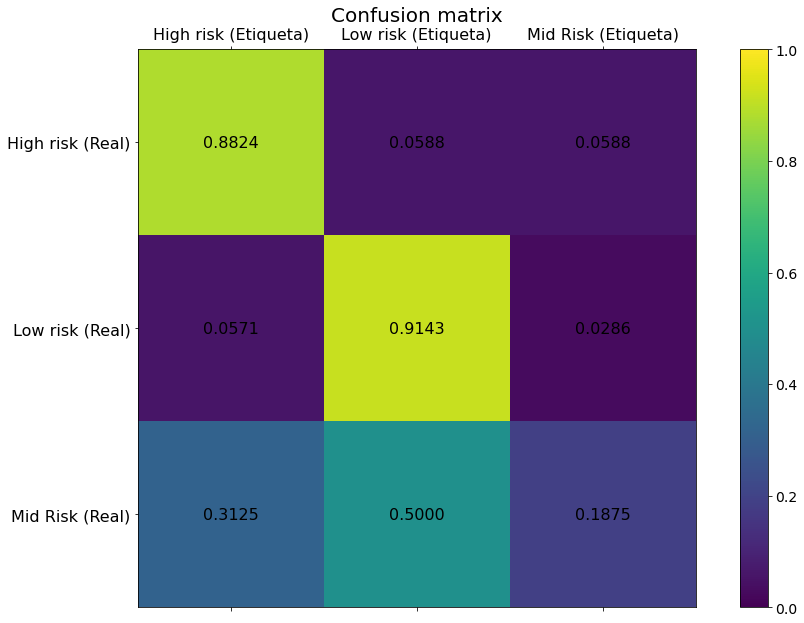

In [230]:
cm = metrics.confusion_matrix(y_test,validacion_tree)
plotCMa(cm,['High risk','Low risk','Mid Risk'])

## logistic regression

In [231]:
from sklearn.preprocessing import LabelEncoder
columna=list(df.describe(include=object).columns)
for i in range(len(columna)):
    print (columna[i],df[columna[i]].unique() )

for i in range (len(columna)):
    etiq = LabelEncoder()
    Label = etiq.fit_transform(df[columna[i]])
    label_embarked = {index: label for index, label in 
                    enumerate(etiq.classes_)}
    label_embarked
    df[columna[i]]=Label

RiskLevel ['high risk' 'low risk' 'mid risk']


/var/folders/6y/9fksy1pj1bnbf51v6nyzx6fc0000gn/T/ipykernel_10247/3959784860.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columna[i]]=Label


In [232]:
X = df.drop(columns=['RiskLevel'])
y = df["RiskLevel"]

In [233]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3,stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5,stratify=y_val)

In [234]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val=scaler.transform(X_val)

In [235]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_val,y_val)

0.6470588235294118

sacando el pocentaje de las clases objetivo

In [236]:
y.value_counts()

1    233
0    112
2    106
Name: RiskLevel, dtype: int64

In [237]:
param_grid = [
    {'C':[1000,50,1,0.5,0.1,0.05],
    'class_weight':[{0: 0.33, 1: 0.34, 2:0.33},{0: 0.4, 1: 0.2, 2:0.4},{0: 0.6, 1: 0.05, 2:0.35}],
    'penalty':['elasticnet'],
    'solver':['saga'],
    'l1_ratio':[0,0.1,0.2,0.3,0.4,0.5]}
]

log_reg_clf = LogisticRegression()

from sklearn.model_selection import GridSearchCV


grid_search = GridSearchCV(log_reg_clf, param_grid,cv=2,
                          return_train_score=True,verbose=1)

grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 108 candidates, totalling 216 fits


/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: C

GridSearchCV(cv=2, estimator=LogisticRegression(),
             param_grid=[{'C': [1000, 50, 1, 0.5, 0.1, 0.05],
                          'class_weight': [{0: 0.33, 1: 0.34, 2: 0.33},
                                           {0: 0.4, 1: 0.2, 2: 0.4},
                                           {0: 0.6, 1: 0.05, 2: 0.35}],
                          'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
                          'penalty': ['elasticnet'], 'solver': ['saga']}],
             return_train_score=True, verbose=1)

In [246]:
print('Mejores hiperparametros: %s' % grid_search.best_params_)

Mejores hiperparametros: {'C': 0.5, 'class_weight': {0: 0.33, 1: 0.34, 2: 0.33}, 'l1_ratio': 0, 'penalty': 'elasticnet', 'solver': 'saga'}


In [247]:
print('Best Score: %s' % grid_search.best_score_)

Best Score: 0.6507901314198178


In [240]:
cvres = grid_search.cv_results_


In [241]:
cvres.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_class_weight', 'param_l1_ratio', 'param_penalty', 'param_solver', 'params', 'split0_test_score', 'split1_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'mean_train_score', 'std_train_score'])

In [242]:
log_reg = LogisticRegression(C=0.5,penalty='elasticnet',class_weight={0: 0.4, 1: 0.2, 2: 0.4},solver='saga',l1_ratio=0.5)
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.5, class_weight={0: 0.4, 1: 0.2, 2: 0.4}, l1_ratio=0.5,
                   penalty='elasticnet', solver='saga')

In [243]:
log_reg.score(X_val,y_val)

0.6323529411764706

In [244]:
predictions_regressor = log_reg.predict(X_test)
print(classification_report(y_test, predictions_regressor))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69        17
           1       0.81      0.86      0.83        35
           2       0.38      0.31      0.34        16

    accuracy                           0.69        68
   macro avg       0.62      0.63      0.62        68
weighted avg       0.67      0.69      0.68        68



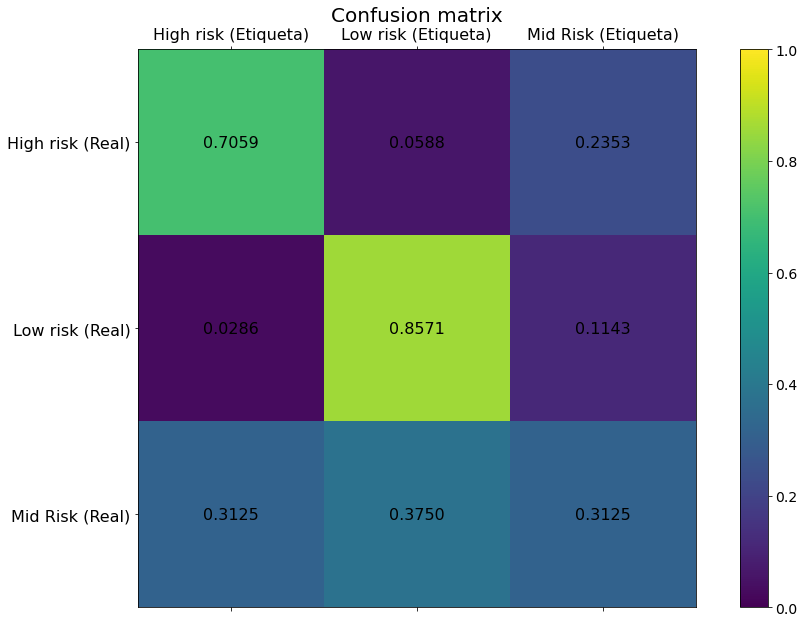

In [245]:
cm = metrics.confusion_matrix(y_test,predictions_regressor)
plotCMa(cm,['High risk','Low risk','Mid Risk'])